In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error

In [16]:
test = pd.read_csv('test_nfaJ3J5.csv')

In [17]:
train = pd.read_csv('train_0irEZ2H.csv')

In [18]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [19]:
train['discount']=(train['base_price']-train['total_price'])/train['base_price']

In [20]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,discount
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,0.11465
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,0.00000
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,0.00000
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,0.00000
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,0.00000


In [27]:
train[train['discount']>0.3].groupby('sku_id')['units_sold'].sum()

sku_id
216233       158
216418       554
216419        93
216425       555
217217      3165
217390       689
217777       659
219009    229597
219029    145698
219844      8454
222087     71743
222765     32811
223153    153089
223245    135070
245338     72004
245387     40437
300021         4
300291      9768
320485      9937
327492      2450
378934      5696
398721     13449
547934      4449
600934      7901
679023        10
Name: units_sold, dtype: int64

In [25]:
train[train['discount']>0.3].groupby('sku_id')['units_sold'].sum()/130

sku_id
216233       1.215385
216418       4.261538
216419       0.715385
216425       4.269231
217217      24.346154
217390       5.300000
217777       5.069231
219009    1766.130769
219029    1120.753846
219844      65.030769
222087     551.869231
222765     252.392308
223153    1177.607692
223245    1039.000000
245338     553.876923
245387     311.053846
300021       0.030769
300291      75.138462
320485      76.438462
327492      18.846154
378934      43.815385
398721     103.453846
547934      34.223077
600934      60.776923
679023       0.076923
Name: units_sold, dtype: float64

In [28]:
def roundoff(x):
    return int(x+0.5)

In [30]:
a=train[train['discount']>0.3].groupby('sku_id')['units_sold'].sum()/130
a = a.apply(roundoff)

In [32]:
b=train.groupby('sku_id')['units_sold'].sum()/130
b = b.apply(roundoff)

In [33]:
b

sku_id
216233    3465
216418    6047
216419    4836
216425    2245
217217     579
217390    4362
217777     498
219009    7417
219029    3466
219844     757
222087    4625
222765    3682
223153    3504
223245    5001
245338    2126
245387    1155
300021    2041
300291     155
320485    1284
327492      40
378934     845
398721     355
545621      15
546789     169
547934     677
600934     151
673209      38
679023     150
Name: units_sold, dtype: int64

In [31]:
a

sku_id
216233       1
216418       4
216419       1
216425       4
217217      24
217390       5
217777       5
219009    1766
219029    1121
219844      65
222087     552
222765     252
223153    1178
223245    1039
245338     554
245387     311
300021       0
300291      75
320485      76
327492      19
378934      44
398721     103
547934      34
600934      61
679023       0
Name: units_sold, dtype: int64

In [4]:
len(train)

150150

In [38]:
test['sku_id'].nunique()

28

In [39]:
test['store_id'].nunique()

76

In [41]:
train['sku_id'].nunique()

28

In [42]:
train['store_id'].nunique()

76

In [54]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [55]:
len(test)

13860

In [56]:
len(test['record_ID'])

13860

In [59]:
test['store_id'].nunique()

76

In [10]:
train.groupby('sku_id')['units_sold'].sum()

sku_id
216233    450420
216418    786087
216419    628711
216425    291885
217217     75241
217390    567046
217777     64721
219009    964194
219029    450563
219844     98434
222087    601228
222765    478596
223153    455473
223245    650165
245338    276325
245387    150161
300021    265390
300291     20103
320485    166902
327492      5171
378934    109909
398721     46178
545621      1980
546789     21988
547934     88008
600934     19632
673209      4929
679023     19442
Name: units_sold, dtype: int64

In [5]:
train['store_id'].value_counts()

8094    3120
9823    2990
8991    2990
8438    2730
8023    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: store_id, Length: 76, dtype: int64

In [14]:
train[train['store_id']==9178]['sku_id'].value_counts()

223153    130
219009    130
245338    130
222765    130
216233    130
223245    130
Name: sku_id, dtype: int64

In [ ]:
train[train['sku_id']==2]

In [60]:
test['sku_id'].value_counts()

219009    900
216233    888
223245    876
219029    876
222087    864
217390    840
222765    828
216418    816
216419    804
216425    792
245338    768
223153    696
300021    540
245387    516
320485    516
378934    420
547934    372
219844    336
217217    312
217777    240
398721    216
300291    108
679023    108
600934     84
546789     84
673209     24
327492     24
545621     12
Name: sku_id, dtype: int64

In [61]:
test['sku_id'].nunique()

28

In [26]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [4]:
len(train)

150150

In [5]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [8]:
# train.isnull().sum()

In [11]:
train['store_id'].nunique()

76

In [12]:
train['store_id'].value_counts()

8094    3120
9823    2990
8991    2990
8438    2730
8023    2730
        ... 
8091    1170
9439    1170
9178     780
9700     650
9001     260
Name: store_id, Length: 76, dtype: int64

In [13]:
train['sku_id'].nunique()

28

In [17]:
train['sku_id'].value_counts()

219009    9750
216233    9620
219029    9490
223245    9490
222087    9360
217390    9100
222765    8970
216418    8840
216419    8710
216425    8580
245338    8319
223153    7540
300021    5850
320485    5590
245387    5590
378934    4550
547934    4030
219844    3640
217217    3380
217777    2600
398721    2340
300291    1170
679023    1170
546789     910
600934     910
673209     260
327492     260
545621     130
Name: sku_id, dtype: int64

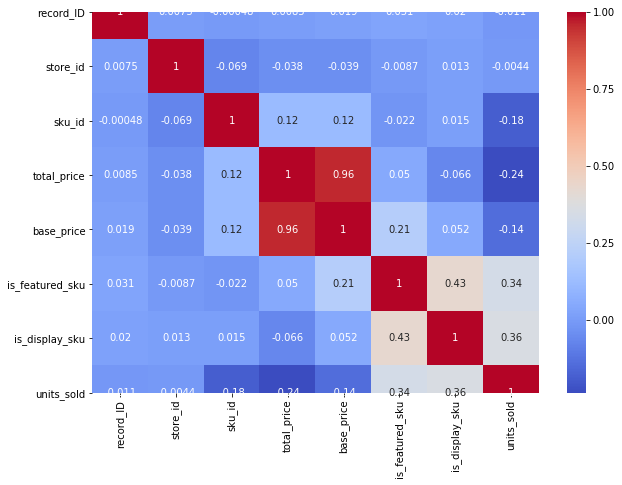

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

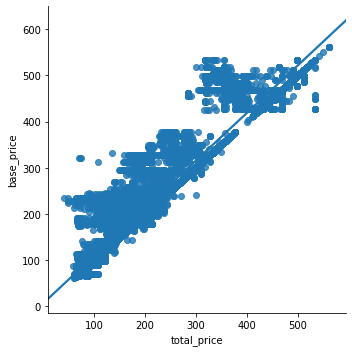

In [15]:
sns.lmplot(x='total_price',y='base_price',data=train)

In [18]:
len(train['record_ID'])

150149

In [32]:
train['week'][0].split('/')

['17', '01', '11']

In [38]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,year
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20,1,11
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28,1,11
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19,1,11
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44,1,11
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52,1,11


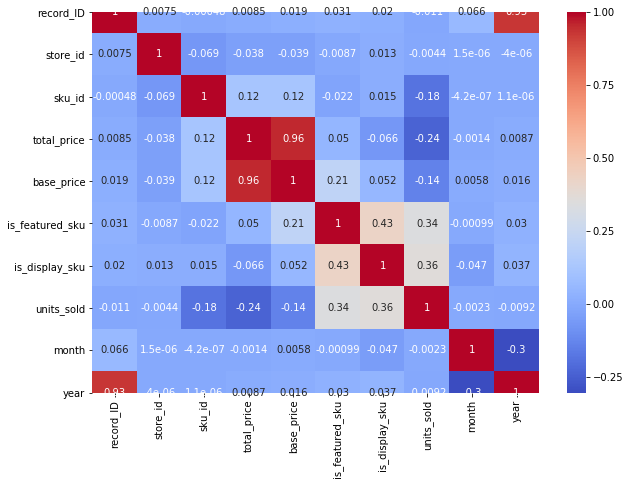

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

In [22]:
train['total_price'] - train['base_price']

0         -12.8250
1           0.0000
2           0.0000
3           0.0000
4           0.0000
            ...   
150145      0.0000
150146      0.0000
150147   -126.1125
150148    -49.8750
150149      0.0000
Length: 150150, dtype: float64

In [23]:
train.dropna(inplace=True)

In [24]:
train['month'] = train['week'].apply(lambda x: int(x.split('/')[1]))
train['year'] = train['week'].apply(lambda x: int(x.split('/')[2]))
test['month'] = test['week'].apply(lambda x: int(x.split('/')[1]))
test['year'] = test['week'].apply(lambda x: int(x.split('/')[2]))

In [25]:
train['difference'] = train['total_price'] - train['base_price']

In [26]:
drop_cols=['week','record_ID','base_price'] 
# Have a base_price-total_price columns for the difference of the prices 

In [27]:
train.drop(drop_cols,axis=1,inplace=True)
test.drop(drop_cols,axis=1,inplace=True)

In [28]:
train.head()

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,month,year,difference
0,8091,216418,99.0375,0,0,20,1,11,-12.825
1,8091,216419,99.0375,0,0,28,1,11,0.000
2,8091,216425,133.9500,0,0,19,1,11,0.000
3,8091,216233,133.9500,0,0,44,1,11,0.000
4,8091,217390,141.0750,0,0,52,1,11,0.000


In [9]:
train.groupby('sku_id')['units_sold'].mean()

sku_id
216233    46.821206
216418    88.923869
216419    72.182664
216425    34.019231
217217    22.260651
217390    62.312747
217777    24.892692
219009    98.891692
219029    47.477661
219844    27.042308
222087    64.233761
222765    53.355184
223153    60.407560
223245    68.510537
245338    33.216012
245387    26.862433
300021    45.365812
300291    17.182051
320485    29.857245
327492    19.888462
378934    24.155824
398721    19.734188
545621    15.230769
546789    24.162637
547934    21.838213
600934    21.573626
673209    18.957692
679023    16.617094
Name: units_sold, dtype: float64

In [10]:
test.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

In [29]:
dummie_col = ['store_id','sku_id']

In [33]:
train_1 = pd.get_dummies(train,columns=dummie_col,drop_first=True)
test_1 = pd.get_dummies(test,columns=dummie_col,drop_first=True)

In [34]:
train_1.head()

,total_price,is_featured_sku,is_display_sku,units_sold,month,year,difference,store_id_8058,store_id_8063,store_id_8091,...,sku_id_320485,sku_id_327492,sku_id_378934,sku_id_398721,sku_id_545621,sku_id_546789,sku_id_547934,sku_id_600934,sku_id_673209,sku_id_679023
0,99.0375,0,0,20,1,11,-12.825,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,99.0375,0,0,28,1,11,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,133.9500,0,0,19,1,11,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,133.9500,0,0,44,1,11,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,141.0750,0,0,52,1,11,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
train_1.shape

(150149, 109)

In [37]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [ ]:
cv = cross_val_score()